<a href="https://colab.research.google.com/github/ezequieldasilvar7/Anonibus/blob/master/Colab_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [34]:
!pip freeze > requirements.txt

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import plotly.express as px

In [3]:
catalogo = pd.read_csv('/content/sample_data/MoviesOnStreamingPlatforms_updated.csv')

In [32]:
catalogo.head()


,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Genres,Language,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,1,0,0,0,0,"Action,Biography,Drama,Sport","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,"Documentary,Biography",English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,"Drama,Musical,Sport","Hindi,English",224.0
4,5,Roma,2018,18+,1,0,0,0,0,"Action,Drama,History,Romance,War",English,52.0


In [31]:
catalogo = catalogo.drop(['IMDb'], axis=1)

In [30]:
catalogo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           9515 non-null   int64  
 1   Title        9515 non-null   object 
 2   Year         9515 non-null   int64  
 3   Age          5338 non-null   object 
 4   IMDb         9309 non-null   object 
 5   Netflix      9515 non-null   int64  
 6   Hulu         9515 non-null   int64  
 7   Prime Video  9515 non-null   int64  
 8   Disney+      9515 non-null   int64  
 9   Type         9515 non-null   int64  
 10  Genres       9399 non-null   object 
 11  Language     9202 non-null   object 
 12  Runtime      9196 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 966.5+ KB


In [21]:
platform = ['Prime Video','Netflix', 'Hulu', 'Disney+']
for i in platform:    
    print('Platform {} Count: {}'. format(i, catalogo[i].sum()))

Platform Prime Video Count: 4113
Platform Netflix Count: 3695
Platform Hulu Count: 1047
Platform Disney+ Count: 922


In [25]:
platform_count = [catalogo[i].sum() for i in platform]
platform_count

[4113, 3695, 1047, 922]

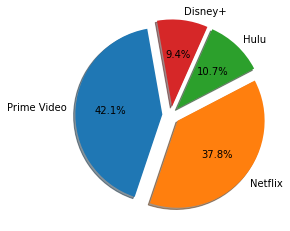

In [24]:
explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(platform_count,
       labels = platform,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100,
       )

ax1.axis = ('equal')
plt.show()

In [35]:
g = catalogo['Genres'].str.split(',').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)

g.name = 'Genres'

del catalogo['Genres']
# join new column with the existing dataframe
catalogo_genres = catalogo.join(g)

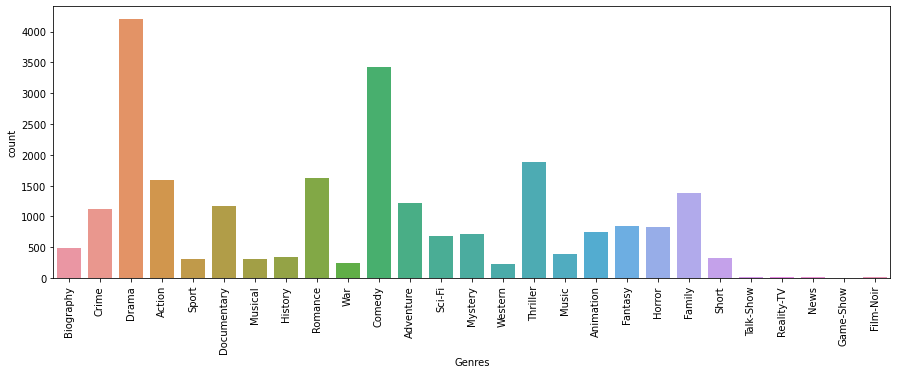

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='Genres', data=catalogo_genres)
plt.xticks(rotation=90)
plt.show()